## Working with Dates and Times

In [1]:
from datetime import date
from datetime import datetime

In [2]:
# Which day of the week?

hurricane_andrew = date(1992, 8, 26)
print(hurricane_andrew.weekday())

2


In [3]:
# How many hurricanes come early?

import pickle

# list of the hurricanes that made landfall in Florida from 1950 to 2017
with open('data/chap01/florida_hurricane_dates.pkl', 'rb') as f:
    florida_hurricane_dates = pickle.load(f)

print('florida_hurricane :', len(florida_hurricane_dates))

# Counter for how many before June 1
early_hurricanes = 0
for hurricane in florida_hurricane_dates:
    if hurricane.month < 6:
        early_hurricanes = early_hurricanes + 1

print('early hurricanes  :', early_hurricanes)

florida_hurricane : 235
early hurricanes  : 10


In [4]:
# Subtracting dates

start = date(2007, 5, 9)
end = date(2007, 12, 13)

print((end - start).days)

218


In [5]:
# Counting events per calendar month

# A dictionary to count hurricanes per calendar month
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0,
                         7: 0, 8: 0, 9: 0,10: 0,11: 0,12: 0}

# Loop over all hurricanes
for hurricane in florida_hurricane_dates:
    month = hurricane.month
    hurricanes_each_month[month] += 1

print(hurricanes_each_month)

{1: 0, 2: 1, 3: 0, 4: 1, 5: 8, 6: 32, 7: 21, 8: 49, 9: 70, 10: 43, 11: 9, 12: 1}


In [6]:
# Putting a list of dates in order

# Print the first and last scrambled dates
print(florida_hurricane_dates[0])
print(florida_hurricane_dates[-1])
print()

# Put the dates in order
dates_ordered = sorted(florida_hurricane_dates)

print(dates_ordered[0])
print(dates_ordered[-1])

1988-08-04
2011-07-18

1950-08-31
2017-10-29


In [7]:
# Printing dates in a friendly format

first_date = florida_hurricane_dates[0]

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat()
us = "Our earliest hurricane date: " + first_date.strftime("%m/%d/%Y")

print("ISO: " + iso)
print("US : " + us)

ISO: Our earliest hurricane date: 1988-08-04
US : Our earliest hurricane date: 08/04/1988


In [8]:
# Creating datetimes by hand

dt = datetime(2017, 10, 1, 15, 26, 26)
print(dt.isoformat())

# Replace the year with 1917
dt_old = dt.replace(year=1917)
print(dt_old)

2017-10-01T15:26:26
1917-10-01 15:26:26


In [9]:
# Counting events before and after noon

import pandas as pd

df = pd.read_csv('data/chap01/capital-onebike.csv')
df = df[['start', 'end']]
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])

onebike_datetimes = df[['start','end']]

# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}

for i, trip in onebike_datetimes.iterrows():
    # Check to see if the trip starts before noon
    if trip.start.hour < 12:
        trip_counts['AM'] += 1
    else:
        trip_counts['PM'] += 1

print(trip_counts)

{'AM': 94, 'PM': 196}


In [10]:
# Convert strings into datetimes

s = '2017-02-03 00:00:01'
fmt = '%Y-%m-%d %H:%M:%S'
d = datetime.strptime(s, fmt)
print(d)

s = '2030-10-15'
fmt = '%Y-%m-%d'
d = datetime.strptime(s, fmt)
print(d)

2017-02-03 00:00:01
2030-10-15 00:00:00


In [11]:
# Unix timestamps

timestamps = [1514665153, 1514664543]

dts = []

for ts in timestamps:
    dts.append(datetime.fromtimestamp(ts))

print(dts)

[datetime.datetime(2017, 12, 31, 5, 19, 13), datetime.datetime(2017, 12, 31, 5, 9, 3)]


In [12]:
# Turning pairs of datetimes into durations

onebike_durations = []

for i, trip in onebike_datetimes.iterrows():
    # Create a timedelta object corresponding to the length of the trip
    trip_duration = trip['end'] - trip['start']

    # Get the total elapsed seconds in trip_duration
    trip_length_seconds = trip_duration.total_seconds()
    
    if trip_length_seconds < -3000:
        print(trip['start'], 'start ~', trip['end'], 'end')

    onebike_durations.append(trip_length_seconds)


# What was the total duration of all trips?
total_elapsed_time = sum(onebike_durations)

# What was the total number of trips?
number_of_trips = len(onebike_durations)

# Divide the total duration by the number of trips
print('\nAverage trip time :', total_elapsed_time / number_of_trips)

# Calculate shortest and longest trips
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)
print("The shortest trip : " + str(shortest_trip) + " seconds")  # -3300 sec. --> timezone 적용 필요.
print("The longest trip  : " + str(longest_trip) + " seconds")

2017-11-05 01:56:00 start ~ 2017-11-05 01:01:00 end

Average trip time : 1178.4827586206898
The shortest trip : -3300.0 seconds
The longest trip  : 76920.0 seconds


### Timezone

In [13]:
from datetime import datetime, timezone, timedelta
from dateutil import tz

In [14]:
UTC = timezone(timedelta(hours=0))

# October 1, 2017 at 15:26:26, UTC
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=UTC)
print(dt.isoformat())

# Create a timezone for Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))
# October 1, 2017 at 15:26:26, UTC-8
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)
print(dt.isoformat())

2017-10-01T15:26:26+00:00
2017-10-01T15:26:26-08:00


In [15]:
# Putting the bike trips into the right time zone

# Create a timezone object
et = tz.gettz('America/New_York')

onebike_durations = []
for i, trip in onebike_datetimes.iterrows():
    # Update
    trip['start'] = trip['start'].replace(tzinfo=et)
    trip['end'] = trip['end'].replace(tzinfo=et)

    trip_duration = trip['end'] - trip['start']
    onebike_durations.append(trip_duration)

shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)
print("The shortest trip : " + str(shortest_trip))
print("The longest trip  : " + str(longest_trip))

The shortest trip : -1 days +23:05:00
The longest trip  : 0 days 21:22:00


In [16]:
# Load CSV into the rides variable
rides = pd.read_csv('data/chap01/capital-onebike.csv',
                    parse_dates=['start', 'end'])

print(rides.iloc[0])

start                         2017-10-01 15:23:00
end                           2017-10-01 15:26:00
start_station_no                            31038
start_station                Glebe Rd & 11th St N
end_station_no                              31036
end_station         George Mason Dr & Wilson Blvd
bike_no                                    W20529
type                                       Member
Name: 0, dtype: object


In [17]:
# Making timedelta columns
ride_durations = rides['end'] - rides['start']
rides['Duration'] = ride_durations.dt.total_seconds()
print(rides['Duration'].head())

0     180.0
1    7620.0
2     300.0
3    1320.0
4    1320.0
Name: Duration, dtype: float64


In [18]:
# How many joyrides?

joyrides = (rides['start_station_no'] == rides['end_station_no'])  # 시작과 종료 station이 같은 경우

print("{} rides were joyrides".format(joyrides.sum()))

print("The median duration overall was {:.2f} seconds".format(rides['Duration'].median()))

print("The median duration for joyrides was {:.2f} seconds".format(rides[joyrides]['Duration'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2640.00 seconds


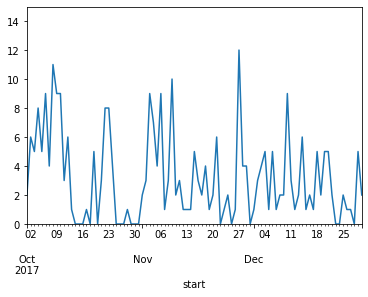

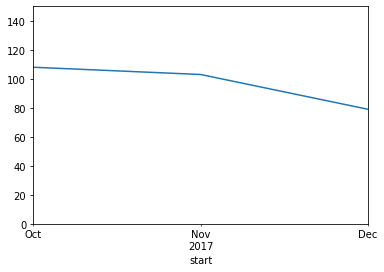

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

# Resample rides to daily(D), take the size, plot the results
rides.resample('D', on='start') \
    .size() \
    .plot(ylim=[0, 15])
plt.show()

# Resample rides to monthly, take the size, plot the results
rides.resample('M', on='start') \
    .size() \
    .plot(ylim=[0, 150])
plt.show()

In [20]:
# Members vs casual riders over time

# Resample rides to be monthly on the basis of start
monthly_rides = rides.resample('M', on='start')['type']

print(monthly_rides.head())

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

0      Member
1      Casual
2      Member
3      Member
4      Member
108    Member
109    Member
110    Member
111    Member
112    Member
211    Member
212    Member
213    Member
214    Member
215    Casual
Name: type, dtype: object
start       type  
2017-10-31  Member    0.768519
            Casual    0.231481
2017-11-30  Member    0.825243
            Casual    0.174757
2017-12-31  Member    0.860759
            Casual    0.139241
Name: type, dtype: float64


In [21]:
# Combining groupby() and resample()

grouped = rides.groupby('type').resample('M', on='start')

print(grouped['Duration'].median())

type    start     
Casual  2017-10-31    1620.0
        2017-11-30    1170.0
        2017-12-31     840.0
Member  2017-10-31     660.0
        2017-11-30     660.0
        2017-12-31     420.0
Name: Duration, dtype: float64


In [22]:
# Timezones in Pandas

rides['start'] = rides['start'].dt.tz_localize('America/New_York', ambiguous='NaT')
rides['end'] = rides['end'].dt.tz_localize('America/New_York', ambiguous='NaT')

print(rides['start'].iloc[0])

2017-10-01 15:23:00-04:00


In [23]:
# How long per weekday?

# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['start'].dt.weekday_name

print(rides.groupby('Ride start weekday')['Duration'].median())

Ride start weekday
Friday       720.0
Monday       780.0
Saturday     480.0
Sunday       900.0
Thursday     660.0
Tuesday      630.0
Wednesday    600.0
Name: Duration, dtype: float64


In [24]:
# How long between rides?

# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['start'] - (rides['end'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on='start')

# Print the average hours between rides each month
print(monthly['Time since'].mean() / (60 * 60))

start
2017-10-31 00:00:00-04:00    5.520405
2017-11-30 00:00:00-05:00    7.256271
2017-12-31 00:00:00-05:00    9.201688
Name: Time since, dtype: float64
